In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
df=pd.read_table('pseudo_facebook.tsv')
df.head(1)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0


##### Total Data Columns summary

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.3+ MB


###### Analysis of missing values

In [157]:
df['gender'].fillna(df['gender'].mode()[0],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   99003 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.3+ MB


Addition of new column

In [159]:
df['mobileTotallikes']=df['mobile_likes']+df['mobile_likes_received']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 16 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   99003 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
mobileTotallikes         99003 non-null int64
dtypes: float64(1), int64(14), object(1)
memory usage: 12.1+ MB


##### Age column converting into age groups

In [28]:
indices=[]
tIndices=[]
yIndices=[]
adIndices=[]
adltIndices=[]
sIndices=[]
for index, row in df.iterrows():
    if row['age']<=14:
        indices.append(index)
    elif row['age']>14 and row['age']<=19:
        tIndices.append(index)
    elif row['age']>19 and row['age']<=25:
        yIndices.append(index)
    elif row['age']>25 and row['age']<=30:
        adIndices.append(index)
    elif row['age']>30 and row['age']<=60:
        adltIndices.append(index)
    else:
        sIndices.append(index)
    

#### Which age group got more likes and do likes on facebook(age groups -- Childern,Teenagers,Adolescents,Adult,Seniors)
Which age group intersted in using FB in mobiles 

In [89]:
childernData = pd.DataFrame(df.ix[indices], columns = df.keys()).reset_index(drop=True)
teenagersData = pd.DataFrame(df.ix[tIndices], columns = df.keys()).reset_index(drop=True)
youthData = pd.DataFrame(df.ix[yIndices], columns = df.keys()).reset_index(drop=True)
adolescentsData = pd.DataFrame(df.ix[adIndices], columns = df.keys()).reset_index(drop=True)
adltsData = pd.DataFrame(df.ix[adltIndices], columns = df.keys()).reset_index(drop=True)
sData = pd.DataFrame(df.ix[sIndices], columns = df.keys()).reset_index(drop=True)

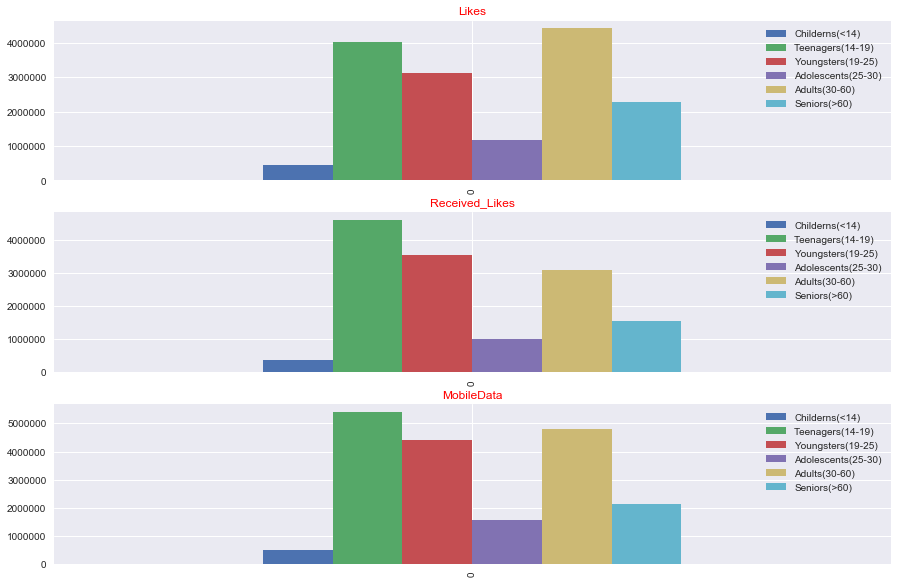

In [141]:
fig, axes = plt.subplots(nrows=3,ncols=1,figsize=(15,10))
moreLikes = [[childernData.likes.sum(),teenagersData.likes.sum(),youthData.likes.sum(),adolescentsData.likes.sum(),adltsData.likes.sum(),sData.likes.sum()]]
userAgegroup = ['Childerns(<14)','Teenagers(14-19)','Youngsters(19-25)','Adolescents(25-30)','Adults(30-60)','Seniors(>60)']
MorelikesuserData = pd.DataFrame(moreLikes,columns=userAgegroup)
MorelikesuserData.plot.bar(ax=axes[0])
axes[0].set_title('Likes',color='r')
moreReceivedlikes = [[childernData.likes_received.sum(),teenagersData.likes_received.sum(),youthData.likes_received.sum(),adolescentsData.likes_received.sum(),adltsData.likes_received.sum(),sData.likes_received.sum()]]
userAgegroup = ['Childerns(<14)','Teenagers(14-19)','Youngsters(19-25)','Adolescents(25-30)','Adults(30-60)','Seniors(>60)']
MorereceivedlikesuserData = pd.DataFrame(moreReceivedlikes,columns=userAgegroup)
MorereceivedlikesuserData.plot.bar(ax=axes[1])
axes[1].set_title('Received_Likes',color='r')
mobileUsageData = [[childernData.mobileTotallikes.sum(),teenagersData.mobileTotallikes.sum(),youthData.mobileTotallikes.sum(),adolescentsData.mobileTotallikes.sum(),adltsData.mobileTotallikes.sum(),sData.mobileTotallikes.sum()]]
userAgegroup = ['Childerns(<14)','Teenagers(14-19)','Youngsters(19-25)','Adolescents(25-30)','Adults(30-60)','Seniors(>60)']
mobileUsageDataDf = pd.DataFrame(mobileUsageData,columns=userAgegroup)
mobileUsageDataDf.plot.bar(ax=axes[2])
axes[2].set_title('MobileData',color='r')

#### who are getting more likes and do likes on facebook either male or female? who have more friends?

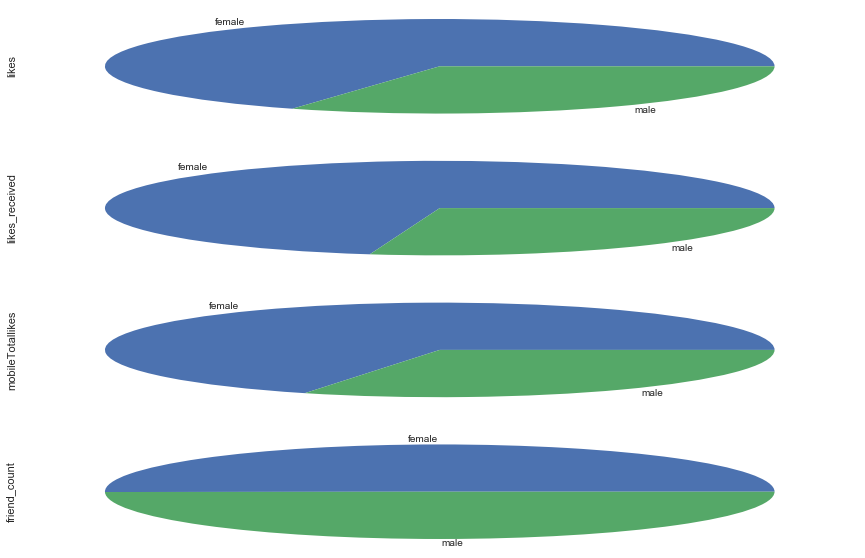

In [167]:
fig,axes=plt.subplots(figsize=(15,10),nrows=4,ncols=1)
doLikes = df.groupby(['gender'])['likes'].sum()
doLikes.plot.pie(ax=axes[0])
ReceivedLikes = df.groupby(['gender'])['likes_received'].sum()
ReceivedLikes.plot.pie(ax=axes[1])
MobileUsage=df.groupby(['gender'])['mobileTotallikes'].sum()
MobileUsage.plot.pie(ax=axes[2])
friendsCount=df.groupby(['gender'])['friend_count'].sum()
friendsCount.plot.pie(ax=axes[3])

#### Date Of Birth Anlaysis

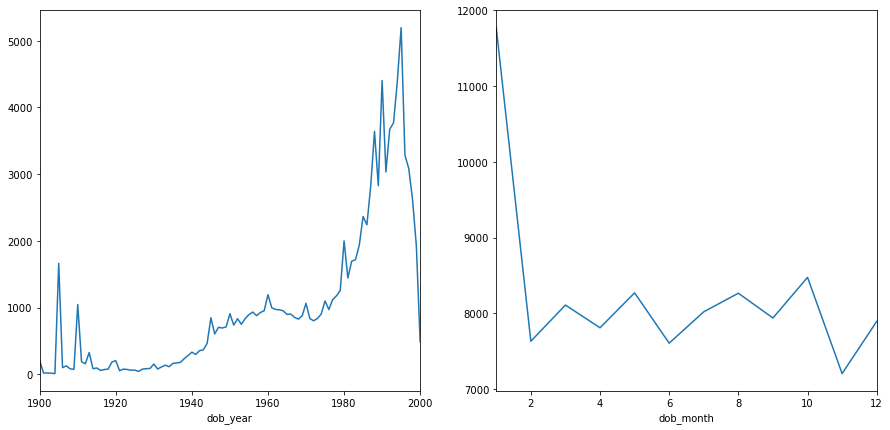

In [14]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,7))
df.groupby(['dob_year'])['userid'].count().plot(ax=axes[0])
df.groupby(['dob_month'])['userid'].count().plot(ax=axes[1])

#### Inactive Users

In [3]:
c=0
for index, row in df.iterrows():
    if row['likes']==0:
        if row['mobile_likes']==0:
                if row['www_likes']==0:
                        c=c+1
    
print("inactiveUsers:",c)

inactiveUsers: 22308
